In [1]:
from skimage import io
import numpy as np
import time
import matplotlib.pyplot as plt
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

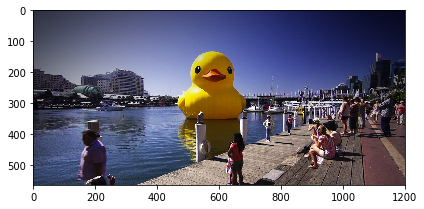

(564, 1200, 3)


In [2]:
# load the image and confirm skimage is imported properly.
image = io.imread('data/small_duck.jpg')
io.imshow(image)
io.show()
print(image.shape)

This single image has over 2 million values. Make sure your code is vectorized and efficient!

In [3]:
# save the dimensions of the image and reshape it for easier manipulation
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(image.shape[0]*image.shape[1],3)
print(image.shape)

(676800, 3)


## Random centroids (15 points)

Each centroid is a point in RGB space (color) in the image. This function should uniformly pick `k` centroids from the dataset.

Input: a single image of shape `(num_instances, 3)` and `k`, the number of centroids. Notice we are flattening the image to a two dimentional array.
Output: Randomly chosen centroids of shape `(k,3)`.

In [15]:
def get_random_centroids(X, k):
    centroids = []
    K_Random_Samples = []
    isInList = True
    for i in range(k):
        while(isInList):
            RandomRowNumber = np.random.randint(0,676800)
            if (RandomRowNumber not in K_Random_Samples):
                isInList = False
            
        K_Random_Samples.append(RandomRowNumber)
        centroids.append(X[RandomRowNumber])
        isInList = True
    
    return np.array(centroids)

In [16]:
k = 7 
centroids = get_random_centroids(image, k)

## Distance function (25 points)

The Minkowski distance is a metric which can be considered as a generalization of the Euclidean and Manhattan distances. 

The Minkoski distance of order $p$ between two points: $\vec{x}=(x_1, ..., x_n)$ and $\vec{y}=(y_1, ..., y_n)$ is:
$$D(\vec{x},\vec{y}) = (\sum_{i=1}^n \mid x_i - y_i \mid ^p)^{\frac{1}{p}}$$

Implement the function `lp_distance` (=Minkoski distance).

Inputs: 
* a single image of shape `(num_instances, 3)` 
* the centroids `(k, 3)`
* the distance parameter p

output: array of shape `(k, num_instances)` thats holds the distances of all points in RGB space from all centroids

In [17]:
def lp_distance(X, centroids, p=2):
    distances = []
    vector_builder = []
    for ctr in centroids:
        vector_builder = minkoski_dist(X, ctr, p)
        distances.append(vector_builder)
         
    return np.array(distances)

def minkoski_dist(x, y, p):
    return np.power(np.sum(np.power(np.absolute(x - y), p), axis = 1), (1/p))


In [18]:

distances = lp_distance(image, centroids, 5)

In [19]:
%%time
def calc_error(classes_list, centroids):
    error = 0
    for i in range(centroids.shape[0]):
        error+= np.sum(np.square(np.linalg.norm()))
        error += np.square(np.linalg.norm(classes_list[i], centroids[i]))
    return error

def kmeans(X, k, p ,max_iter=100):
    """
    Inputs:
    - X: a single image of shape (num_features, 3).
    - k: number of centroids.
    - p: the parameter governing the distance measure.
    - max_iter: the maximum number of iterations to perform.
    Outpust:
    - The calculated centroids
    - The final assignment of all RGB points to the closest centroids
    """

    centroids = (get_random_centroids(X, k))
    error = 1
    classes = np.empty(len(X))
    class_list = []
    centroids_old = np.zeros(centroids.shape)
    isOk = False
    
    a = 0
    while(a < max_iter and error != 0):
        a=a+1
        
        ## compute all the distances from all points to all centroids
        dist_board = lp_distance(X, centroids, p)
        
        ## assign each point to it's nearset 
        classes = np.argmin(dist_board,axis=0)
        X = np.column_stack((X, classes))
        centroids_old = np.copy(centroids)
        
        ## update the new centroids
        for i in range(k):
            ctr = np.mean(X[X[:,-1] == i], axis=0)
            ctr = np.delete(ctr,-1)
            centroids[i] = ctr
        X = np.delete(X,-1,1)
    
        
        ## calc the error
        error = 0
        for i in range(k):
            error += np.sum(centroids[i] - centroids_old[i]) 
            
    
        
    classes = classes.astype(int)
    centroids = np.array(centroids)
    return centroids, classes.reshape(len(classes),1)

Wall time: 0 ns


We obtained the locally optimal centroids (colors) from our image. To reconstruct the compressed image, we need to specify the color for each pixel that our algorithm associated with some centroid. The following cell does that for you.

In [20]:

centroids, classes = kmeans(image, k=16, p=1, max_iter=100)

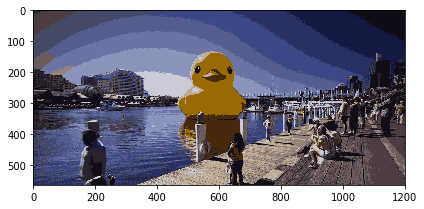

In [21]:
classes = classes.reshape(rows,cols) 
compressed_image = np.zeros((classes.shape[0],classes.shape[1],3),dtype=np.uint8 )
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
            compressed_image[i,j,:] = centroids[classes[i,j],:]
io.imshow(compressed_image)
io.show()

## Hyper parameter tuning (20 points)

Pick 5 values for `p` and compare the results. Include both qualtitative and quantitivie analysis such as graphs, images and additional visualizations and explanations as you see fit.

Image for p= 1


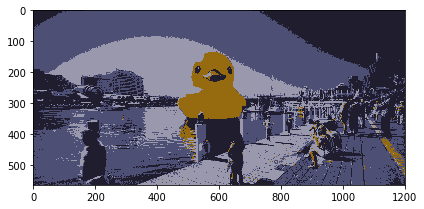

Image for p= 2


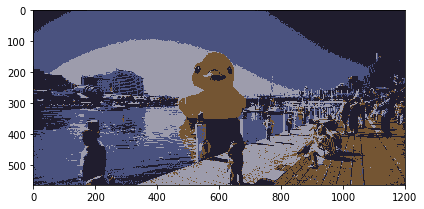

Image for p= 3


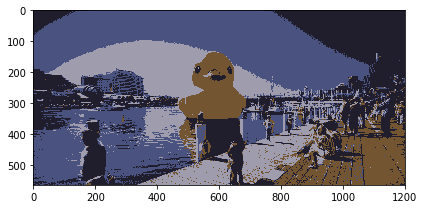

C:\Users\tshro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


Image for p= 10


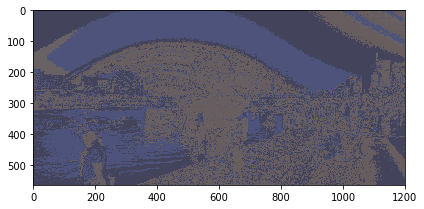

C:\Users\tshro\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\tshro\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Image for p= 15


C:\Users\tshro\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


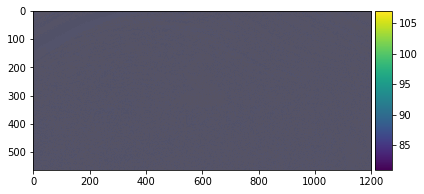

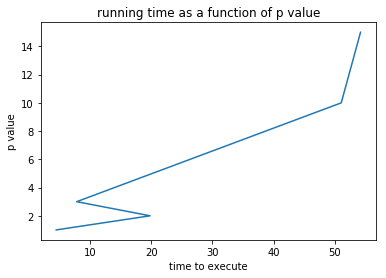

In [14]:
p_list = [1,2,3,10,15]
times = []
for i in range(5):
    start = time.time()
    img = np.copy(image)
    centroids, classes = kmeans(img, k=4, p=p_list[i], max_iter=100)
    print("Image for p=",p_list[i])
    end = time.time() - start
    times.append(end)
    classes = classes.reshape(rows,cols) 
    compressed_image = np.zeros((classes.shape[0],classes.shape[1],3),dtype=np.uint8 )
    for i in range(classes.shape[0]):
        for j in range(classes.shape[1]):
                compressed_image[i,j,:] = centroids[classes[i,j],:]
    io.imshow(compressed_image)
    io.show()
    
plt.plot(times, p_list)
plt.xlabel('time to execute')
plt.ylabel('p value')
plt.title('running time as a function of p value')
plt.show()

In [ ]:
#As we can see from the graph above, bigger p values effect the running time of the clustring algorithm
# This is probably due to the calculation the computer has to do with p power
# We can also observe that with p value of 10 and 15, the image lost its clearence at became a blury gray picture,
# it may happning because with big p value the distance function makes one centroide to be the closest to all image's pixles
# which cause most of the points to become the same color.